In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from numpy.typing import NDArray

In [190]:
def bin2dec(bin: NDArray, n: int) -> NDArray:
    bin = bin.reshape(-1, n)
    bin = np.sum(bin * 2 ** np.arange(n)[::-1], axis=1)
    return bin


def qammod(data: NDArray, M: int) -> NDArray:
    """
    QAM modulation function.

    Parameters:
    data : array_like
        The input data symbols to be modulated.
    M : int
        The order of the QAM modulation (e.g., 16 for 16-QAM).

    Returns:
    modulated_signal : ndarray
        The modulated QAM signal.
    """
    # Calculate the number of bits per symbol
    k = int(np.log2(M))

    # Generate the constellation points
    constellation = np.array(
        [
            complex(i, j)
            for i in range(-int(np.sqrt(M)) + 1, int(np.sqrt(M)), 2)
            for j in range(-int(np.sqrt(M)) + 1, int(np.sqrt(M)), 2)
        ]
    )

    # Normalize the constellation points to have unit average power
    # constellation = constellation / np.sqrt(np.mean(np.abs(constellation) ** 2))

    # Map input data to constellation points
    modulated_signal = constellation[data]

    return modulated_signal

In [191]:
info = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])  # Informação
M = 16  # Número de símbolos da modulação
n = np.log2(M).astype(int)  # Número de bits por símbolo
Rb = 1024  # Taxa de bits [bps]
Rs = Rb / n  # Taxa de símbolos [baud]
Tb = 1 / Rb  # Tempo de bit
Ts = 1 / Rs  # Tempo de símbolo
t = np.arange(0, n * Ts, Ts / (M**2))

In [192]:
symbols = bin2dec(info, n)
symbols

array([ 1,  8,  5, 12])

array([-3.-1.j,  1.-3.j, -1.-1.j,  3.-3.j])

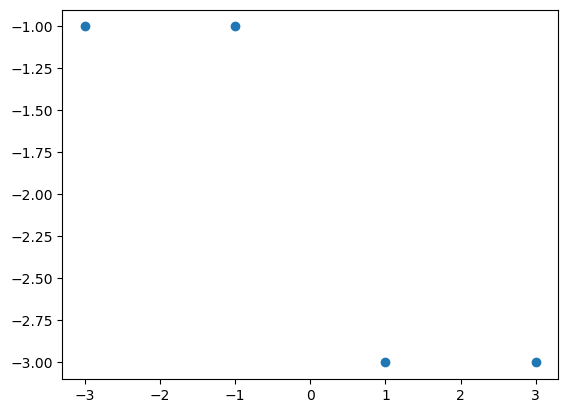

In [193]:
modulated = qammod(symbols, M)
plt.scatter(modulated.real, modulated.imag)
modulated

I: [-3.  1. -1.  3.]
Q: [-1. -3. -1. -3.]


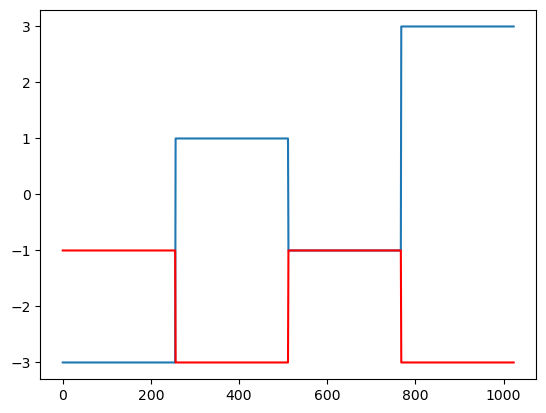

In [194]:
I = modulated.real
Q = modulated.imag

# NRZ upsample
I_4pam = np.repeat(I, Rs)
Q_4pam = np.repeat(Q, Rs)

print("I:", I)
print("Q:", Q)

plt.figure()
plt.plot(I_4pam)
plt.plot(Q_4pam, "r")
plt.show()

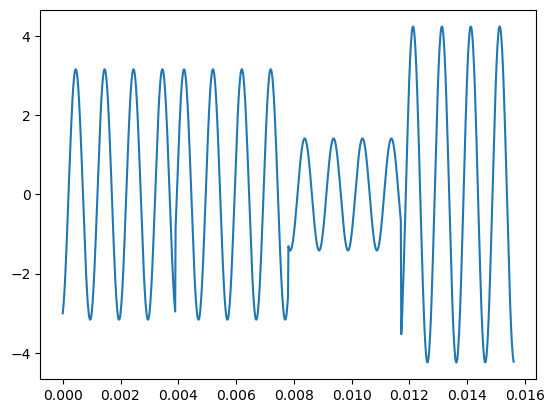

In [195]:
tx = I_4pam * np.cos(2 * np.pi * 1000 * t) - Q_4pam * np.sin(2 * np.pi * 1000 * t)

plt.figure()
plt.plot(t, tx)